In [1]:
import kagglehub


path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

100%|██████████| 427M/427M [00:02<00:00, 155MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [2]:
import shutil
source_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1"
destination_path = "/content/dataset"
shutil.move(source_path, destination_path)

'/content/dataset/1'

✅ GPU is being used!
Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
565/565 ━━━━━━━━━━━━━━━━━━━━ 358s 613ms/step - accuracy: 0.7736 - loss: 0.4557 - val_accuracy: 0.9246 - val_loss: 0.2017
Epoch 2/25
565/565 ━━━━━━━━━━━━━━━━━━━━ 333s 590ms/step - accuracy: 0.8842 - loss: 0.2817 - val_accuracy: 0.9262 - val_loss: 0.1954
Epoch 3/25
565/565 ━━━━━━━━━━━━━━━━━━━━ 334s 591ms/step - accuracy: 0.8944 - loss: 0.2680 - val_accuracy: 0.9335 - val_loss: 0.1958
Epoch 4/25
565/565 ━━━━━━━━━━━━━━━━━━━━ 332s 589ms/step - accuracy: 0.8998 - loss: 0.2522 - val_accuracy: 0.9173 - val_loss: 0.2128
Epoch 5/25
565/565 ━━━━━━━━━━━━━━━━━━━━ 335s 593ms/step - accuracy: 0.8992 - loss: 0.2583 - val_accuracy: 0.9357 - val_loss: 0.1809
Epoch 6/25
565/565 ━━━━━━━━━━━━━━━━━━━━ 332s 587ms/step - accuracy: 0.9053 - loss: 0.2427 - val_accuracy: 0.9289 - val_loss: 0.1835
Epoch 7/25
565/565 ━━━━━━━━━━━━━━━━━━━━ 336s 595ms/step - accuracy: 0.9044 - loss: 0.2374 - val_accuracy: 0.9164 - val_loss: 0.2188
Epoch 8/25
565/565 ━━━━━━━━━━━━━━━━━━━━ 346s 612ms/step - accuracy: 0.9123 -

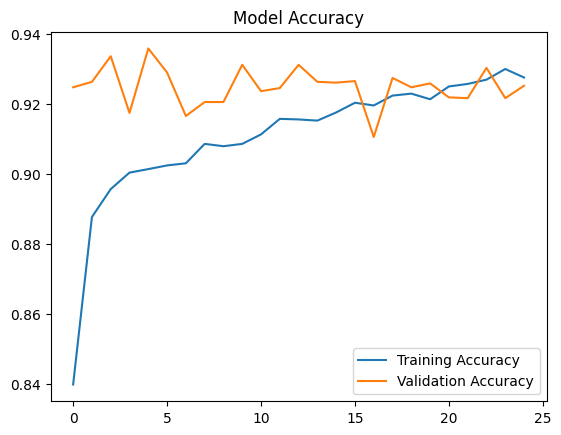

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU is being used!")
    except RuntimeError as e:
        print(e)


train_dir = "/content/dataset/1/DATASET/TRAIN"
test_dir = "/content/dataset/1/DATASET/TEST"


IMG_SIZE = (224, 224)
BATCH_SIZE = 32


train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation"
)


base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights="imagenet")
base_model.trainable = False


model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(128, activation="relu"),
    Dense(1, activation="sigmoid")
])


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

EPOCHS = 25
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)


model.save("waste_classifier_mobilenet_gpu.h5")
model.save("/content/drive/MyDrive/Temp/waste_classifier_mobilenet_gpu.h5")


plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Model Accuracy")
plt.show()


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted: Recyclable Waste


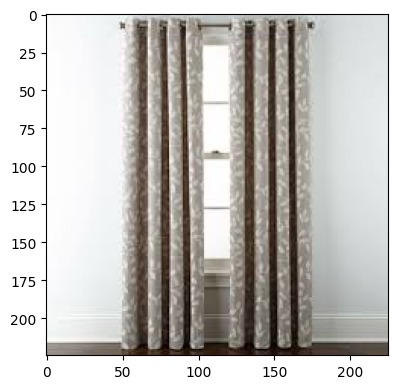

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
import matplotlib.pyplot as plt

model = load_model("E:/projects/internships/edunet_github/final_project/waste_classifier_mobilenet_gpu.h5")


model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


def predict_waste(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]

    if prediction >= 0.5:
        print("Predicted: Recyclable Waste")
    else:
        print("Predicted: Organic Waste")
img=cv2.imread("E:/projects/internships/edunet_github/R_10038.jpg")
plt.figure(figsize=(6,4))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.tight_layout()
predict_waste("E:/projects/internships/edunet_github/R_10038.jpg")

